In this lab, we will explore Chicago housing data contained in the file housing.xlsx. This data file contains census tract data for the median monthly rent in 2016, the proportion of single parents, and the median household income in 2016.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from scipy import stats
import matplotlib as mpl
import seaborn as sns; sns.set()
import math
import folium
from folium.features import DivIcon

1) Let's read in the data.

In [2]:
housing = pd.read_excel('housing.xlsx') #Import data directly from data portal
housing.head(2)

,rent,singleparent,income
0,815,0.2362,41380
1,905,0.3673,42253


2) Let's create a column "rent buden" which gives the proportion of income spent on rent. 

In [3]:
for i in housing.index:
    housing.loc[i,"rent burden"]=12*housing.loc[i,"rent"]/housing.loc[i,"income"]
    if housing.loc[i,"rent burden"]<.3:
        housing.loc[i,"class"]=0
    else:
        housing.loc[i,"class"]=1
housing.head(10)

,rent,singleparent,income,rent burden,class
0,815,0.2362,41380,0.236346,0.0
1,905,0.3673,42253,0.257023,0.0
2,677,0.4372,39784,0.204203,0.0
3,1019,0.0437,60510,0.202082,0.0
4,1306,0.4110,96576,0.162276,0.0
5,1617,0.0631,148825,0.130381,0.0
6,980,0.2852,48652,0.241717,0.0
7,921,0.3333,34741,0.318126,1.0
8,764,0.5053,32095,0.285652,0.0
9,939,0.8277,33805,0.333323,1.0


3) Let's make a graph of x="rent burden" and "y=singleparent"

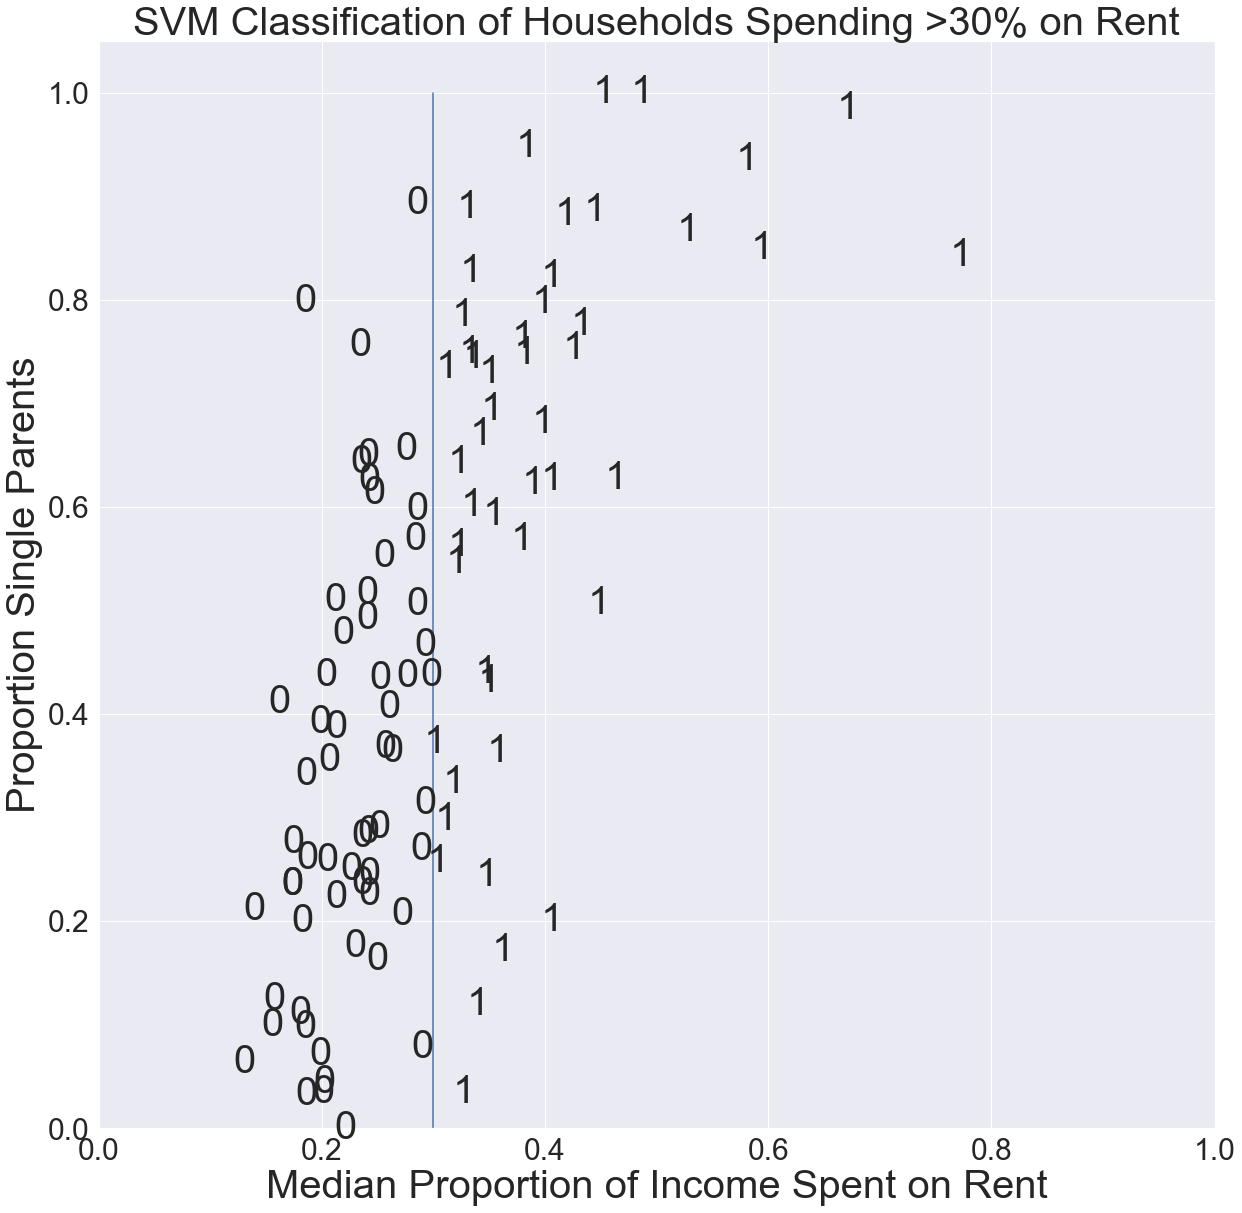

In [4]:
#create a figure
plt.figure(figsize=(20,20))
plt.xlim(0,1)
plt.ylim(0,1.05)


for i in housing.index:
    if housing.loc[i,"class"]==0:
        plt.text(housing.loc[i,"rent burden"],housing.loc[i,"singleparent"],0,size=40,ha='center',va='center')
    else:
        plt.text(housing.loc[i,"rent burden"],housing.loc[i,"singleparent"],1,size=40,ha='center',va='center')
        
# Add the hyperplane

xx=np.linspace(.3,.3000001,100)
yy = np.linspace(0,1,100)
plt.plot(xx, yy)

plt.xlabel("Median Proportion of Income Spent on Rent",size=40)   
plt.ylabel("Proportion Single Parents",size=40)
plt.xticks(size=30)
plt.yticks(size=30)
plt.title("SVM Classification of Households Spending >30% on Rent",size=40)
plt.savefig("chihousing1.png")
plt.show()

4) Now let's use support vector classification to read in the data points and attempt to find a hyperplane that linearly separates the data. 

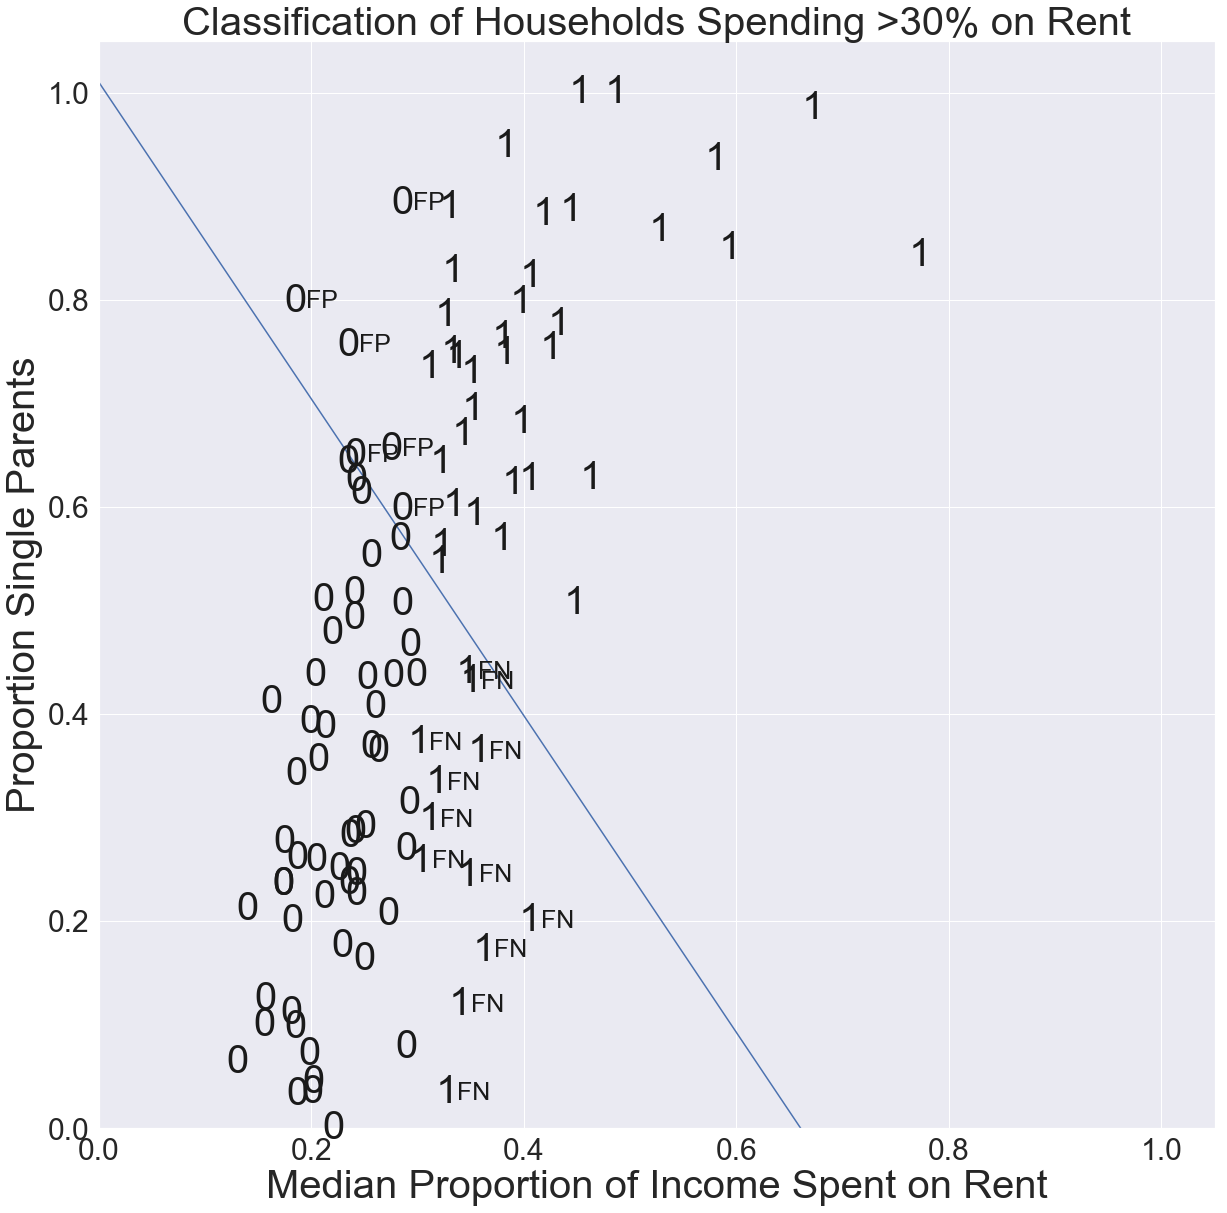

In [5]:
# Creates a model to fit the housing data to a linear hyperplane. 
# We set the cost C to the default cost of 1. 
model = SVC(kernel='linear', C=1)
X=housing[["rent burden","singleparent"]]
Y=housing["class"]
model.fit(X,Y)
#create a figure
plt.figure(figsize=(20,20))
plt.xlim(0,1.05)
plt.ylim(0,1.05)
   
TP=0 
FP=0
TN=0
FN=0

# Add the hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 10)
yy = a * xx - (model.intercept_[0]) / w[1]
plt.plot(xx, yy)

for i in housing.index:
    x=housing.loc[i,"rent burden"]
    y=housing.loc[i,"singleparent"]
    if (housing.loc[i,"class"]==1 and y>a * x - (model.intercept_[0]) / w[1]):
        plt.text(housing.loc[i,"rent burden"],housing.loc[i,"singleparent"],"1",color='k',size=40,va='center',ha='center')
        TP=TP+1
    if (housing.loc[i,"class"]==1 and y<a * x - (model.intercept_[0]) / w[1]):
        plt.text(housing.loc[i,"rent burden"],housing.loc[i,"singleparent"],"1",color="k",size=40,va='center',ha='center')
    if (housing.loc[i,"class"]==1 and y<a * x - (model.intercept_[0]) / w[1]):
        plt.text(housing.loc[i,"rent burden"]+.01,housing.loc[i,"singleparent"],"FN",color="k",size=25,va='center',ha='left')
        FN=FN+1
    if (housing.loc[i,"class"]==0 and y>a * x - (model.intercept_[0]) / w[1]):
        plt.text(housing.loc[i,"rent burden"],housing.loc[i,"singleparent"],"0",color='k',size=40,va='center',ha='center')
        TN=TN+1
    if (housing.loc[i,"class"]==0 and y>a * x - (model.intercept_[0]) / w[1]):
        plt.text(housing.loc[i,"rent burden"]+.01,housing.loc[i,"singleparent"],"FP",color='k',size=25,va='center',ha='left')
        FP=FP+1
    if housing.loc[i,"class"]==0 and y<a * x - (model.intercept_[0]) / w[1]:
        plt.text(housing.loc[i,"rent burden"],housing.loc[i,"singleparent"],"0",color='k',size=40,va='center',ha='center')    
plt.xlabel("Median Proportion of Income Spent on Rent",size=40)   
plt.ylabel("Proportion Single Parents",size=40)
plt.title("Classification of Households Spending >30% on Rent",size=40)
plt.xticks(size=30)
plt.yticks(size=30)
plt.savefig("chihousing2.png")
plt.show()

Find formulas for precision and recall. Then give those scores as well.

In [6]:
N=TP+FP+TN+FN
Precision=TP/(TP+FP)
Recall=TP/(TP+FN)
print("Accuracy=", (TP+TN)/N)
print("Recall=", TP/(TP+FN))
print("Precision=", TP/(TP+FP))
print("F-score=",  (2 * Precision * Recall) / (Precision + Recall))

Accuracy= 0.7
Recall= 0.75
Precision= 0.8571428571428571
F-score= 0.7999999999999999
